### Linear Regression
Data used - House Rent Dataset (https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
house_rent_dataset = pd.read_csv("./House_Rent_Dataset.csv")
house_rent_dataset.sample(5)

rent = house_rent_dataset["Rent"].describe()
size = house_rent_dataset["Size"].describe()
print("**** rent info *****")
print(rent)
print("**** size info *****")
print(size)

**** rent info *****
count       4,746.00
mean       34,993.45
std        78,106.41
min         1,200.00
25%        10,000.00
50%        16,000.00
75%        33,000.00
max     3,500,000.00
Name: Rent, dtype: float64
**** size info *****
count   4,746.00
mean      967.49
std       634.20
min        10.00
25%       550.00
50%       850.00
75%     1,200.00
max     8,000.00
Name: Size, dtype: float64


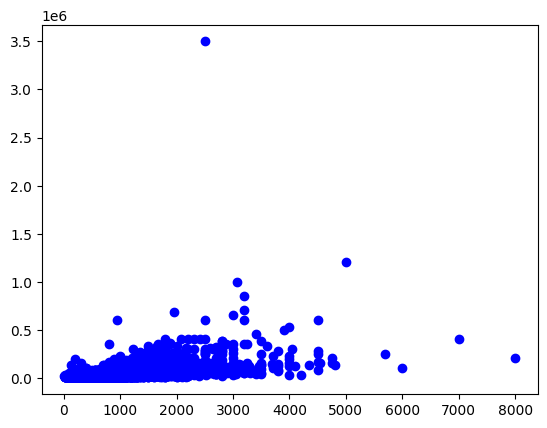

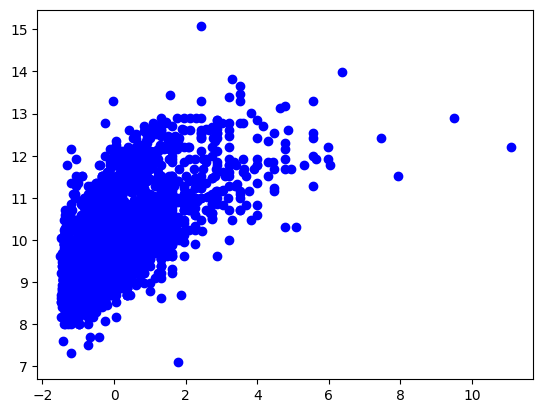

In [3]:
def ZNormalization(X):
    mean = np.mean(X)
    sd = np.std(X)
    return (X - mean) / sd

def logNormalization(X, reverse=False):
    if reverse:
        # Reverse Z-normalization (denormalizing)
        return np.expm1(X)
    else:
        # Z-normalization (standardizing)
        return np.log1p(X)
        
y = np.array(house_rent_dataset[ "Rent" ])
x = np.array(house_rent_dataset[ "Size" ])
plt.scatter(x, y, color='blue', label="Actual Data")  
plt.show()
x_norm = ZNormalization(x)
y_log = np.log1p(y)
plt.scatter(x_norm, y_log, color='blue', label="Actual Data")  
plt.show()

# Simple Linear Regression

In this example, we are going to use **Size** of a house to predict its **Rent**. We will follow the process of **Simple Linear Regression** to derive the values of the slope \( m \) and the intercept \( b \) in the equation:

$$
y = mx + b
$$

Where:
- \( y \) is the variable we want to predict (dependent variable). In this case, **Rent**.
- \( x \) is the variable used for predicting \( y \) (independent variable). Here, **Size**.
- \( m \) is the slope, and \( b \) is the intercept.

### Goal

Our goal is to calculate the unknown parameters \( m \) (slope) and \( b \) (intercept) using the known values of \( y \) (Rent) and \( x \) (Size). The simplest way to calculate \( m \) and \( b \) is using the following formulas:

$$
m = \frac{(y - b)}{x}
$$

$$
b = y - mx
$$

However, these equations only work for individual data points and don't help us compute the parameters for the entire dataset. To optimize the model, we need to use a different approach called **Gradient Descent**.

## Gradient Descent

### 1. **Initial Setup**
We start by randomly selecting values for \( m \) (slope) and \( b \) (intercept). Then, using these initial guesses, we calculate the predicted values (\( \hat{y} \)) for Rent using the formula:

$$
\hat{y}_i = m \cdot x_i + b
$$

Where \( \hat{y}_i \) is the predicted Rent for the \( i \)-th house, and \( x_i \) is the Size of the \( i \)-th house.

### 2. **Calculate the Error**
The next step is to calculate the error between the predicted Rent (\( \hat{y}_i \)) and the actual Rent values (\( y_i \)). The error can be calculated using the **Mean Squared Error (MSE)** formula:

$$
J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- \( n \) is the number of data points (houses).
- \( (y_i - \hat{y}_i)^2 \) is the squared difference between the actual and predicted values, which ensures all errors are positive.
- Dividing by \( n \) gives the average error for the entire dataset.

### 3. **Update Parameters (Gradient Descent Step)**
To minimize the error \( J(m, b) \), we need to adjust the parameters \( m \) and \( b \). This is done by using the **Gradient Descent** algorithm, which updates the parameters iteratively in the direction that reduces the error.

The update rules for \( m \) and \( b \) are:

$$
m = m - \alpha \cdot \frac{\partial J}{\partial m}
$$

$$
b = b - \alpha \cdot \frac{\partial J}{\partial b}
$$

Where:
- \( \alpha \) is the **learning rate**, a small positive value that controls how much we adjust \( m \) and \( b \) in each iteration.
- \( \frac{\partial J}{\partial m} \) and \( \frac{\partial J}{\partial b} \) are the partial derivatives of the cost function with respect to \( m \) and \( b \), respectively. These tell us how much the cost function changes when \( m \) and \( b \) are adjusted.

### 4. **Partial Derivatives**
The partial derivatives are calculated as:

$$
\frac{\partial J}{\partial m} = \frac{-2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
$$

$$
\frac{\partial J}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

These derivatives indicate the direction in which \( m \) and \( b \) should be adjusted in order to minimize the error.

### 5. **Repeat the Process**
We repeat the above steps (calculating the error, updating the parameters) until the error is sufficiently small, or after a predefined number of iterations. The values of \( m \) and \( b \) that result from this process will be our optimal parameters for the linear regression model.

### Conclusion

By using gradient descent, we can iteratively find the best values of \( m \) and \( b \) that minimize the error, leading to an optimized linear regression model. This process allows us to make predictions for Rent based on the Size of houses.

In [4]:
class SimpleLinearRegression:
    def __init__(self, y: np.ndarray, x: np.ndarray):
        self.y_actual = y
        self.y_pred = np.zeros(self.y_actual.shape)
        self.x = x
        self.m = 0
        self.b = 10
        self.n = len(y)
        self.alpha = 0.001 
        self.tolerance = 1e-6  # Stopping tolerance

    def gradientDescent(self):
        dm = (2 / self.n) * np.sum(self.x * (self.y_pred - self.y_actual))  
        db = (2 / self.n) * np.sum(self.y_pred - self.y_actual)
        self.m = self.m - self.alpha * dm
        self.b = self.b - self.alpha * db

    def meanSquareError(self):
        m = 2 * self.n
        return float(np.sum((self.y_pred - self.y_actual) ** 2) / m)  # Fixed power operator

    def calcSlopeAndIntercept(self, max_iterations=10000, verbose=True):
        prev_error = math.inf 
        curr_error = 1
        prev_m = self.m  # Track previous m and b for convergence check
        prev_b = self.b
        numberOfSteps = 1

        while numberOfSteps <= max_iterations:
            # Display progress if verbose
            if verbose:
                print(f"Iteration: {numberOfSteps}")
                print(f"m = {self.m}, b = {self.b}, Error = {curr_error}")

            prev_error = curr_error
            self.y_pred = self.m * self.x + self.b

            curr_error = self.meanSquareError()

            self.gradientDescent()

            if abs(self.m - prev_m) < self.tolerance and abs(self.b - prev_b) < self.tolerance:
                if verbose: print("Converged: m and b are not changing significantly.")
                break

            if abs(prev_error - curr_error) / prev_error < self.tolerance:
                if verbose: print("Converged: Error is changing very little.")
                break

            # Check for divergence (error starts increasing)
            if numberOfSteps > 10  and curr_error > prev_error:
                if verbose: print("Warning: Error is increasing, possibly due to a high learning rate.")
                break

            # Track previous m and b for next iteration
            prev_m, prev_b = self.m, self.b

            numberOfSteps += 1

        return [self.m, self.b]

0.5200470284117683 9.88092194827598


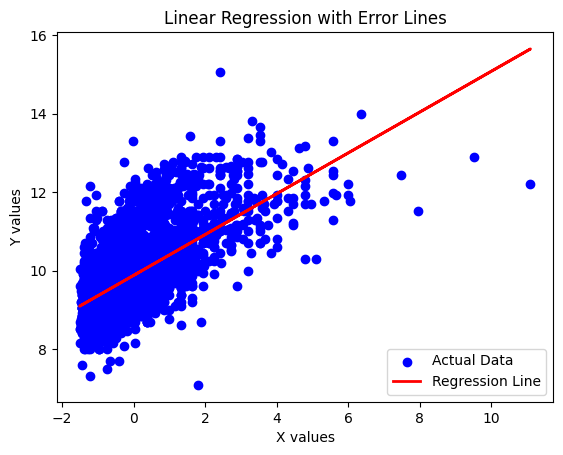

In [5]:
SLR = SimpleLinearRegression(y_log, x_norm)
slope, intercept = SLR.calcSlopeAndIntercept(verbose=False)
y_pred = intercept + slope * x_norm
print(slope, intercept)

plt.scatter(x_norm, y_log, color='blue', label="Actual Data")  
plt.plot(x_norm, y_pred, color='red', linewidth=2, label="Regression Line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Linear Regression with Error Lines")
plt.legend()
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression


# Create & train the model
model = LinearRegression()
model.fit(x_norm.reshape(-1,1), y_log.reshape(-1,1))

# Predict prices
y_pred = model.predict(x_norm.reshape(-1,1))

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: [9.87821326]
Coefficients: [[0.53187662]]


In [11]:
y = np.array(house_rent_dataset["Rent"])
x = np.array(house_rent_dataset["Size"])

# Ensure x is reshaped properly
y_norm_pred = (x_norm.reshape(-1, 1) * model.coef_) + model.intercept_

# Combine all arrays after reshaping to match dimensions
combined = np.hstack([
    x.reshape(-1, 1), 
    y.reshape(-1, 1), 
    x_norm.reshape(-1,1),
    y_log.reshape(-1,1),
    y_norm_pred, 
    np.expm1(y_norm_pred)
])
# Convert NumPy array to Pandas DataFrame
df = pd.DataFrame(combined, columns= ["Size", "Actual Rent", "Size normalized", "Rent normalized", "Predicted Rent (log)", "Predicted Rent"])

# Save to Excel file
file_name = "house_rent_predictions.xlsx"
df.to_excel(file_name, index=False)

In [10]:
x_norm.shape

(4746,)